# What's Cooking?
**Description**: Python script to load and visualize What's Cooking Data
**Other sources**: used lemmitization code from @DipayanSinhaRoy https://www.kaggle.com/dipayan/whats-cooking/whatscooking-python

In [7]:
# imports
%pylab inline
import pandas as pd
import re

from time import time
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


## Loading Training Data
Here, I read in the json files using the pandas module's json reader. The columns or features for the training data are: *id*, *cuisine* and *ingredients*. The *ingredients* are the **predictors** and *cuisine* is the response.

In [8]:
# Read JSON data using pandas
# columns are: id, cuisine, ingredients
data  = pd.read_json('train.json')

labels = LabelEncoder()
labels.fit(data.cuisine)
all_classes = labels.classes_
num_classes = len(all_classes)

# Get numerical labels for ytrain 
y_train = labels.transform(data.cuisine)

## Vectorizing Text Features
An important step in working with text data is to **vectorize** them somehow for input to standard optimization algorithms. First, I clean up the text input using [WordNet Lemmatization](http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization). I then use the [TfidVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html) from Scikit-learn module to vectorize the ingredient features into an array of floats.

In [9]:
# Vectorization of ingredients Using WordNet lemmatization & Tfid
data['ingredients_clean_string'] = [' , '.join(z).strip() for z in data['ingredients']]  
data['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in data['ingredients']]

vectorizer  = TfidfVectorizer(stop_words='english', ngram_range=(1,1), max_df=0.57, analyzer='word', token_pattern=r'\w+')
x_train     = vectorizer.fit_transform(data.ingredients_string).todense()
ingred_dict = vectorizer.vocabulary_

## Limiting Classes
To go easy on my machine's resources (memory and cpu), I limit the number of cuisines/classes to two or three: british(1), chinese(3) and indian(3).

In [10]:
# limit training data: british, chinese & indian
idx = np.logical_or(y_train==1, y_train==3)
idx = np.logical_or(idx, y_train==7)
# idx = np.logical_or(idx, y_train==5)
# idx = np.logical_or(idx, y_train==2)
x_train = x_train[idx]
y_train = y_train[idx]

## Visualization Feature Space
Here, I proceed to visualize the feature space using a linear dimensionality reduction technique - Principal Component Analysis (PCA), and then a non-linear one: [t-SNE](http://lvdmaaten.github.io/tsne/). 

PCA: 24 sec


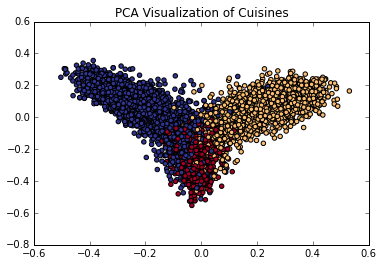

In [11]:
# Visualize Using PCA 
t0 = time()
x_pca = PCA(n_components=2).fit_transform(x_train)
t1 = time()
print("PCA: %.2g sec" % (t1 - t0))
figure()
ccm = cm.get_cmap('RdYlBu')
scatter(x_pca[:,0], x_pca[:,1], c=y_train, cmap=ccm)
title('PCA Visualization of Cuisines')

Computing t-SNE embedding
t-SNE: 1.1e+03 sec


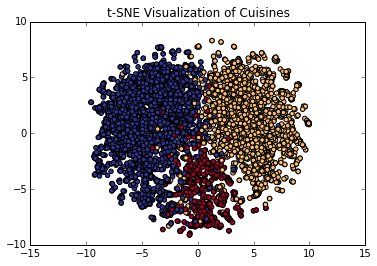

In [12]:
# Visualize Using t-SNE
print("Computing t-SNE embedding")
t0 = time()
tsne = TSNE(n_components=2, init='pca', random_state=0)
x_tsne = tsne.fit_transform(x_train)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
figure()
scatter(x_tsne[:,0], x_tsne[:,1], c=y_train, cmap=ccm)
title('t-SNE Visualization of Cuisines')